In [205]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
df = pd.read_csv("/Users/ar.galanin/Documents/coding/DataScience/Physical activity/Physical_Activity_Monitoring_unlabeled.csv")
df = df.drop(columns=['timestamp'])

NameError: name 'pd' is not defined

In [179]:
df.head()

,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,handGyro2,handGyro3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,34.8750,0.902847,7.45872,6.032490,1.006100,7.44575,6.303650,-0.021952,0.004114,-0.000752,...,-0.025606,0.030239,-14.5447,27.3336,-5.76620,0.206416,0.348212,0.763201,-0.503652,5
1,29.7500,-4.069330,3.76168,8.279720,-5.972500,3.22273,6.908970,0.116054,-0.375968,-0.012890,...,-0.670163,1.786200,-32.8257,-15.7719,-1.31395,0.578332,-0.566734,0.405888,-0.423791,2
2,34.3750,-2.007540,-9.60180,0.773674,-1.803500,-9.58937,1.073680,0.020131,0.042189,-0.011507,...,-0.009741,-0.006579,-18.8171,16.3089,25.29280,0.139776,0.676586,0.393796,0.606316,8
3,31.9375,-13.262200,5.85443,0.899334,-13.611500,5.91511,0.840377,1.715630,-0.050492,-1.829000,...,-0.163470,-3.495570,-26.7418,34.3566,21.32740,0.416303,0.783387,0.306464,0.345075,2
4,33.5000,-0.013940,8.66540,4.398210,0.144153,8.56816,4.822200,-0.006938,-0.007383,-0.032679,...,-0.028172,-0.003737,-17.7798,-3.9981,10.99500,0.171133,-0.748343,0.252988,-0.588807,6


In [182]:
df.shape

(534601, 45)

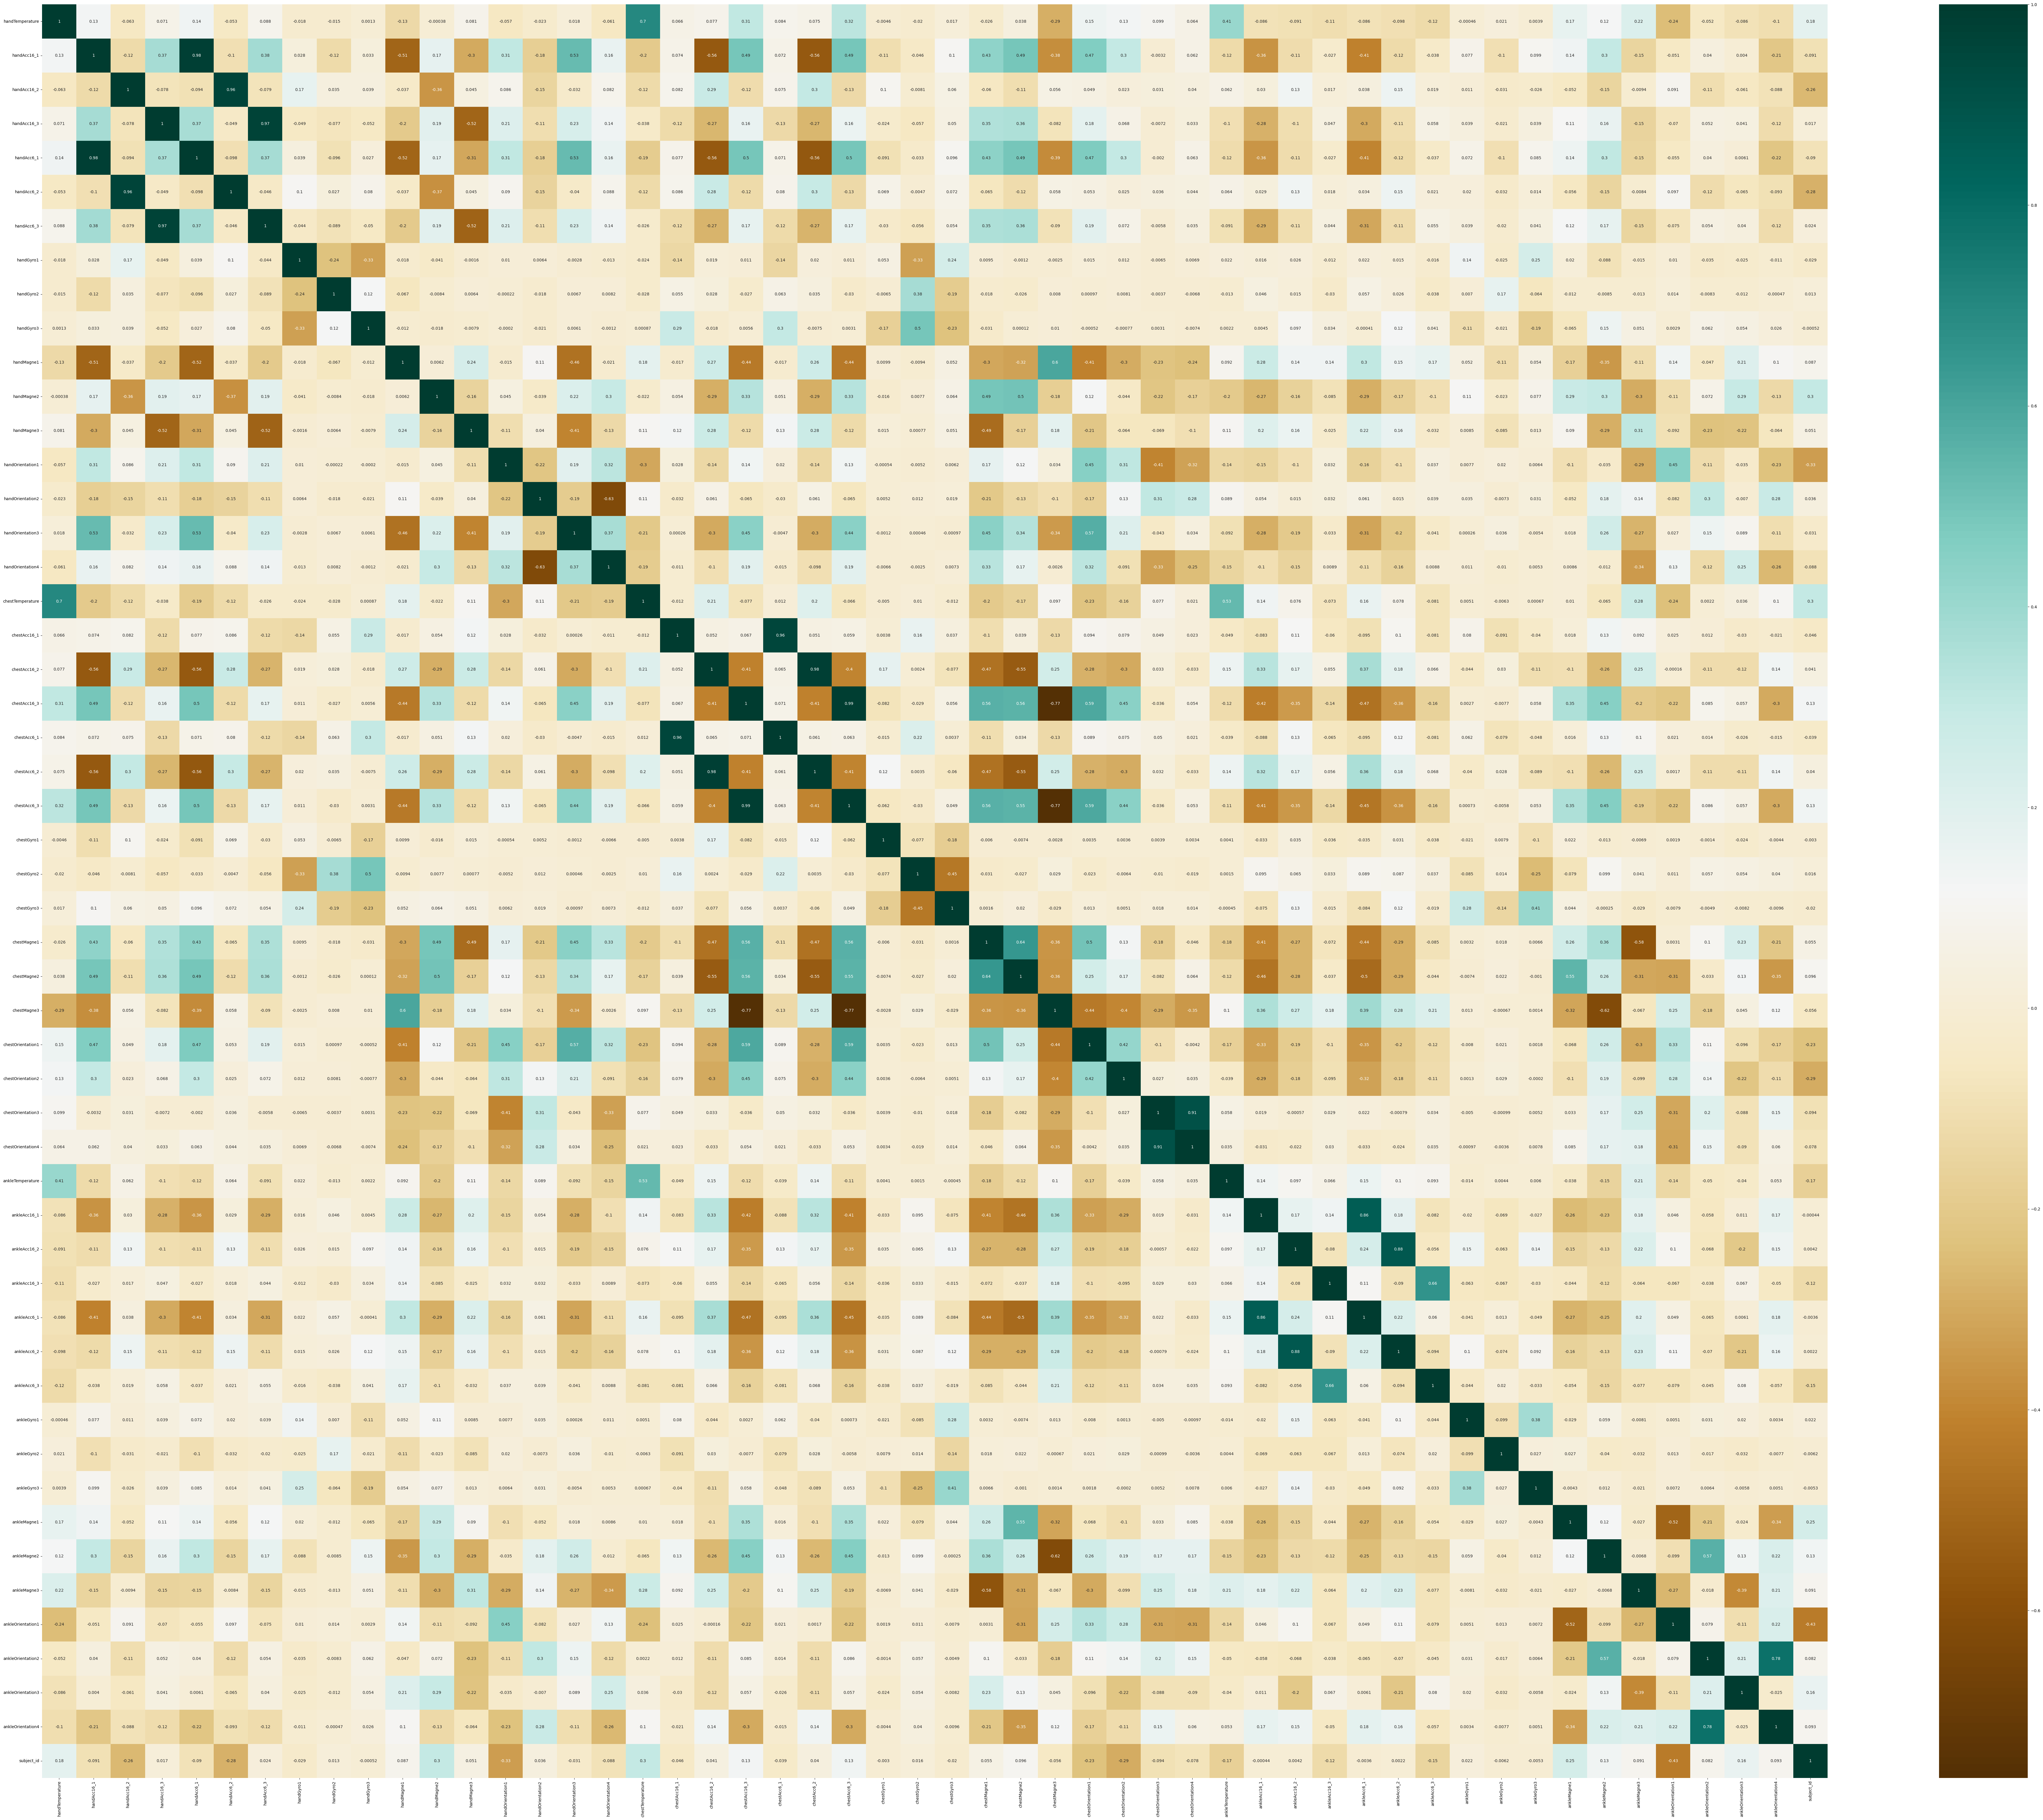

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt

# Построение тепловой карты корреляции
plt.figure(figsize=(100, 80))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='BrBG')
plt.show()

In [16]:
# колтчество пропусков
df.isna().sum()

timestamp            0
handTemperature      0
handAcc16_1          0
handAcc16_2          0
handAcc16_3          0
handAcc6_1           0
handAcc6_2           0
handAcc6_3           0
handGyro1            0
handGyro2            0
handGyro3            0
handMagne1           0
handMagne2           0
handMagne3           0
handOrientation1     0
handOrientation2     0
handOrientation3     0
handOrientation4     0
chestTemperature     0
chestAcc16_1         0
chestAcc16_2         0
chestAcc16_3         0
chestAcc6_1          0
chestAcc6_2          0
chestAcc6_3          0
chestGyro1           0
chestGyro2           0
chestGyro3           0
chestMagne1          0
chestMagne2          0
chestMagne3          0
chestOrientation1    0
chestOrientation2    0
chestOrientation3    0
chestOrientation4    0
ankleTemperature     0
ankleAcc16_1         0
ankleAcc16_2         0
ankleAcc16_3         0
ankleAcc6_1          0
ankleAcc6_2          0
ankleAcc6_3          0
ankleGyro1           0
ankleGyro2 

In [221]:
# заполнение пропусков значением моды
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
df.isna().sum()

In [222]:
# удаление корреляции
correlation_matrix = df.corr().abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
df = df.drop(to_drop, axis=1)

In [140]:
print(df_filtered.shape)
print(df.shape)

(534601, 53)
(534601, 46)


In [12]:
%%time
# кластеризация для различного количества кластеров 
from sklearn.cluster import KMeans

inertia_df = pd.DataFrame(data=[], index=range(8, 20), columns=['inertia'])

for n_clusters in range(5, 20):
    clusterer = KMeans(n_clusters=n_clusters,  random_state=42)
    cluster_labels = clusterer.fit_predict(df)

    # inertia
    inertia_df.loc[n_clusters] = clusterer.inertia_

/Users/ar.galanin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ar.galanin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ar.galanin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/ar.galanin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 15min 28s, sys: 2min 20s, total: 17min 48s
Wall time: 2min 30s


<Axes: >

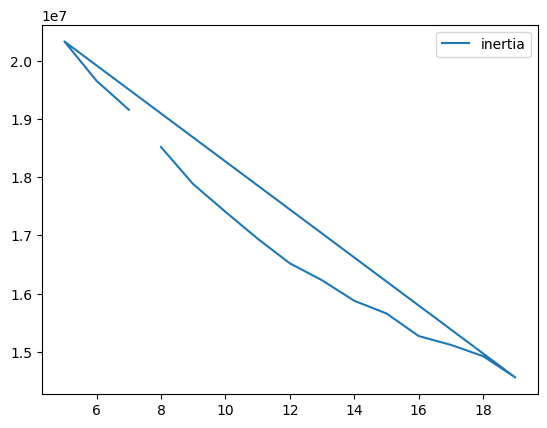

In [14]:
inertia_df.plot()

In [223]:

%%time
from sklearn.cluster import KMeans

n_clusters = 8

clusterer = KMeans(n_clusters=n_clusters)

cluster_labels = clusterer.fit_predict(df)

# inertia
inertia = clusterer.inertia_

/Users/ar.galanin/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: user 36.1 s, sys: 10.9 s, total: 47 s
Wall time: 6.57 s


In [22]:
print("For n_clusters =", n_clusters,
      ", the inertia is :", inertia)

For n_clusters = 16 , the inertia is : 15334926.31691087


In [225]:
# преобразование результата к соответсвоющему виду
from collections import OrderedDict
import numpy as np
unique_elements = np.array(list(OrderedDict.fromkeys(cluster_labels)))
x=[]
for i in range(len(cluster_labels)):
    cluster_labels[i]=np.where(unique_elements==cluster_labels[i])[0]+1
    x.append(cluster_labels[i])

In [226]:
predictions = pd.DataFrame(x, columns=['activityID'])
predictions = predictions.reset_index()
predictions=predictions.rename(columns={'index': 'Index'})

In [217]:
predictions

,Index,activityID
0,0,1
1,1,2
2,2,3
3,3,4
4,4,5
...,...,...
534596,534596,5
534597,534597,6
534598,534598,6
534599,534599,9


In [227]:
predictions.to_csv("predict.csv", index=False)

In [228]:
from IPython import display

# Создание ссылки для скачивания файла
display.FileLink("predict.csv")

/Users/ar.galanin/Documents/coding/DataScience/Physical activity/predict.csv